In [22]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

# Generating data

In [23]:
X,Y = make_blobs(n_samples=500,centers=2,n_features=2,random_state=11)
print(X.shape,Y.shape)

(500, 2) (500,)


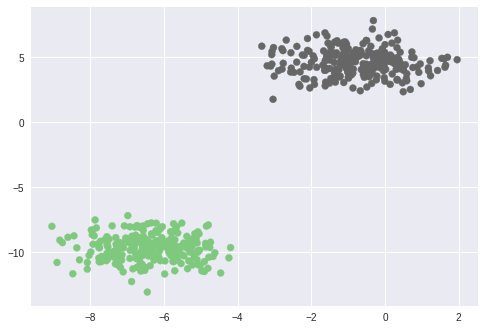

In [24]:
plt.style.use("seaborn")
plt.scatter(X[:,0],X[:,1],c=Y,cmap=plt.cm.Accent)
plt.show()

# Model and helper functions

In [25]:
def sigmoid(z):
    return (1.0)/(1+np.exp(-z))

In [26]:
z = np.array([1,2,3,4,5])
sigmoid(z)

array([0.73105858, 0.88079708, 0.95257413, 0.98201379, 0.99330715])

# Implement perceptron learning algorithm 
- Learn the weights
- Reduce the loss
- Make predictions

In [27]:
def predict(X,weights):
    z = np.dot(X,weights)
    predictions = sigmoid(z)
    return predictions

In [28]:
def loss(X,Y,weights):
    Y_ = predict(X,weights)
    cost = np.mean(-Y*np.log(Y_) - (1-Y)*np.log(1-Y_))
    return cost

In [29]:
def update(X,Y,weights,learning_rate):
    Y_ = predict(X,weights)
    dw = np.dot(X.T,Y_ - Y)
    m = X.shape[0]
    weights = weights - learning_rate*dw/(float(m))
    return weights

In [30]:
def train(X,Y,learning_rate=0.5,maxEpochs=100):
    ones = np.ones((X.shape[0],1))
    X = np.hstack((ones,X))
    weights = np.zeros(X.shape[1])
    
    for epoch in range(maxEpochs):
        weights = update(X,Y,weights,learning_rate)
        
        if epoch%10==0:
            l = loss(X,Y,weights)
            print("Epoch %d Loss %.4f"%(epoch,l))
            
    return weights

In [34]:
weights = train(X,Y,maxEpochs=500)

Epoch 0 Loss 0.0018
Epoch 10 Loss 0.0016
Epoch 20 Loss 0.0015
Epoch 30 Loss 0.0014
Epoch 40 Loss 0.0013
Epoch 50 Loss 0.0012
Epoch 60 Loss 0.0011
Epoch 70 Loss 0.0010
Epoch 80 Loss 0.0010
Epoch 90 Loss 0.0009
Epoch 100 Loss 0.0009
Epoch 110 Loss 0.0008
Epoch 120 Loss 0.0008
Epoch 130 Loss 0.0008
Epoch 140 Loss 0.0007
Epoch 150 Loss 0.0007
Epoch 160 Loss 0.0007
Epoch 170 Loss 0.0007
Epoch 180 Loss 0.0006
Epoch 190 Loss 0.0006
Epoch 200 Loss 0.0006
Epoch 210 Loss 0.0006
Epoch 220 Loss 0.0006
Epoch 230 Loss 0.0005
Epoch 240 Loss 0.0005
Epoch 250 Loss 0.0005
Epoch 260 Loss 0.0005
Epoch 270 Loss 0.0005
Epoch 280 Loss 0.0005
Epoch 290 Loss 0.0005
Epoch 300 Loss 0.0004
Epoch 310 Loss 0.0004
Epoch 320 Loss 0.0004
Epoch 330 Loss 0.0004
Epoch 340 Loss 0.0004
Epoch 350 Loss 0.0004
Epoch 360 Loss 0.0004
Epoch 370 Loss 0.0004
Epoch 380 Loss 0.0004
Epoch 390 Loss 0.0004
Epoch 400 Loss 0.0004
Epoch 410 Loss 0.0003
Epoch 420 Loss 0.0003
Epoch 430 Loss 0.0003
Epoch 440 Loss 0.0003
Epoch 450 Loss 0.0003

In [35]:
def getPredictions(X_Test,weights,labels=True):
    if X_Test.shape[1] != weights.shape[0]:
        ones = np.ones((X_Test.shape[0],1))
        X_Test = np.hstack((ones,X_Test))
        
    probs = predict(X_Test,weights)
    
    if not labels:
        return probs
    else:
        labels = np.zeros(probs.shape)
        labels[probs>=0.5] = 1
        return labels

In [36]:
x1 = np.linspace(-8,2,10)
print(x1)

x2 = -(weights[0] + weights[1]*x1)/weights[2]
print(x2)

[-8.         -6.88888889 -5.77777778 -4.66666667 -3.55555556 -2.44444444
 -1.33333333 -0.22222222  0.88888889  2.        ]
[ 1.4068853   1.20173435  0.99658341  0.79143246  0.58628152  0.38113057
  0.17597963 -0.02917132 -0.23432226 -0.43947321]


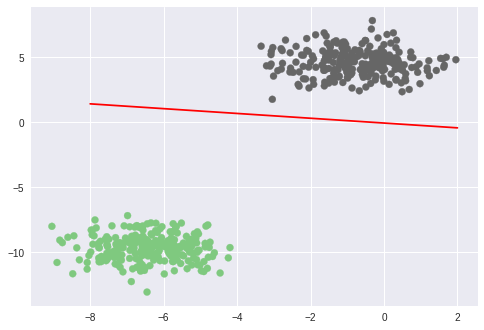

In [37]:
plt.scatter(X[:,0],X[:,1],c=Y,cmap=plt.cm.Accent)
plt.plot(x1,x2,c='red')
plt.show()

In [38]:
Y_ = getPredictions(X,weights)
print(Y_)

[1. 1. 0. 0. 0. 1. 1. 1. 1. 0. 1. 0. 1. 0. 1. 0. 0. 1. 0. 0. 0. 1. 1. 0.
 0. 0. 0. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 0. 0. 0. 0.
 1. 0. 1. 0. 0. 0. 1. 1. 0. 1. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 0. 1.
 1. 1. 0. 1. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 1. 1. 0. 1. 1. 0. 0. 0. 1. 1.
 1. 0. 1. 1. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 1. 0. 1. 0. 0. 1. 1. 0. 1. 1.
 0. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 1.
 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1.
 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 1. 0. 1. 0. 0. 0. 1.
 0. 0. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1.
 1. 0. 0. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 0. 1. 0. 0. 1. 0. 1. 1. 0. 0. 1.
 0. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 0. 1. 1. 1. 0. 0. 1. 0. 1. 0. 1. 1. 1.
 0. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 0. 1. 1. 1. 1. 0. 1. 1. 0. 1. 0. 1.
 0. 1. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 1. 1. 1. 0. 1. 1. 0. 0.
 0. 1. 1. 1. 1. 0. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0.

In [39]:
np.sum(Y_==Y)/Y.shape[0]

1.0